<a href="https://colab.research.google.com/github/srk310590/credit-risk-model/blob/main/Credit_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [38]:
data = pd.read_csv('/content/credit_risk_dataset.csv')

In [39]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [40]:
# Info regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [41]:
# Summary of all columns
data.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


**Exploratory Data Analysis**

<Axes: title={'center': 'Age Distribution'}, xlabel='person_age', ylabel='Count'>

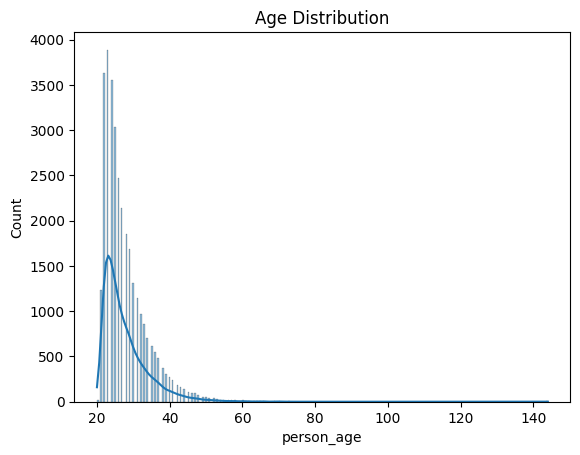

In [42]:
## Age Distribution ##
figsize=(10,8)
plt.title('Age Distribution')
sns.histplot(data['person_age'], kde=True)



*   Cap Age at 100



<Axes: title={'center': 'Person Income'}, xlabel='person_income', ylabel='Count'>

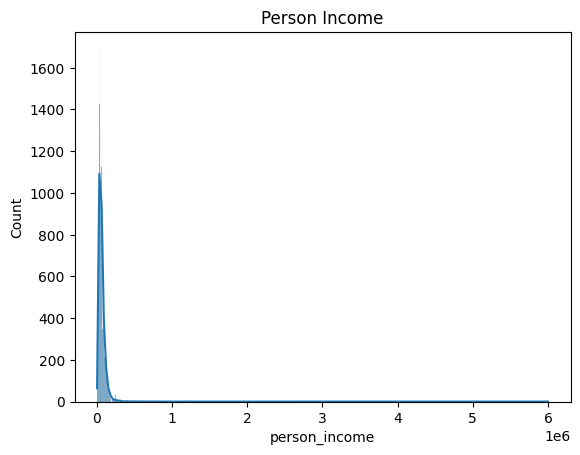

In [43]:
## Person Income ##
figsize=(10,50)
plt.title('Person Income')
sns.histplot(data['person_income'], kde=True)

<Axes: title={'center': 'Person Employment Length'}, xlabel='person_emp_length', ylabel='Count'>

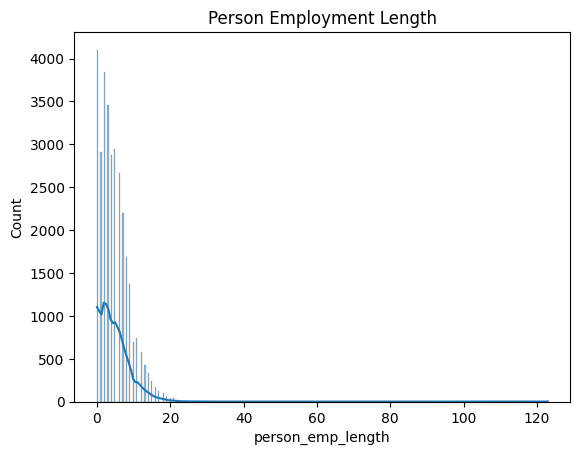

In [44]:
## Person Employment Length
figsize=(10,8)
plt.title('Person Employment Length')
sns.histplot(data['person_emp_length'], kde=True)

* Employment Length = 123 seems to be incorrect. We will cap it at a lower value

<Axes: title={'center': 'Loan Amount'}, xlabel='loan_amnt', ylabel='Count'>

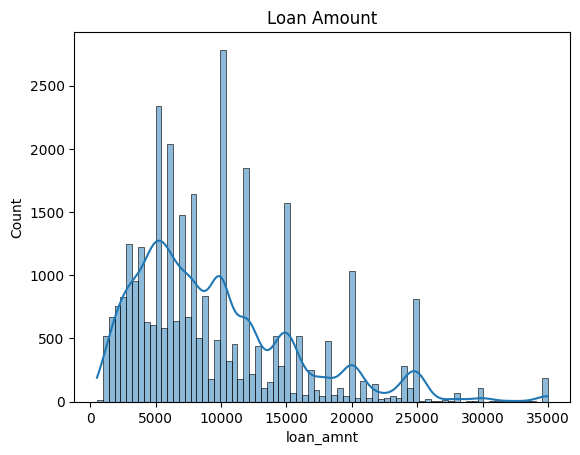

In [45]:
## Loan Amount ##
figsize=(10,8)
plt.title('Loan Amount')
sns.histplot(data['loan_amnt'], kde=True)

<Axes: title={'center': 'Loan Interest Rate'}, xlabel='loan_int_rate', ylabel='Count'>

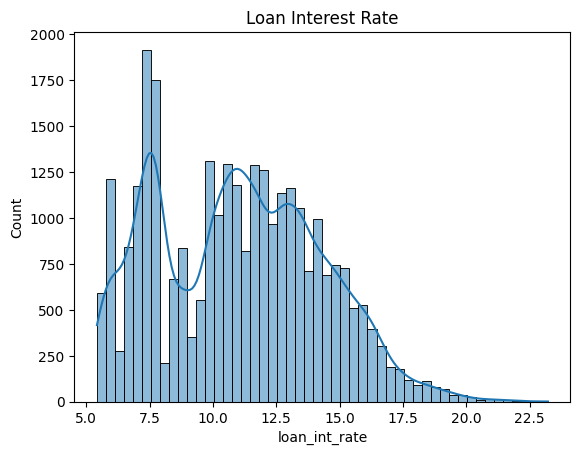

In [46]:
## Loan Interest Rate ##
figsize=(10,8)
plt.title('Loan Interest Rate')
sns.histplot(data['loan_int_rate'], kde=True)

In [47]:
data['cb_person_cred_hist_length'].value_counts()

,count
cb_person_cred_hist_length,
2,5965
3,5943
4,5925
8,1902
7,1901
9,1895
5,1881
6,1857
10,1850


<Axes: title={'center': 'Defaulted'}, xlabel='count', ylabel='cb_person_default_on_file'>

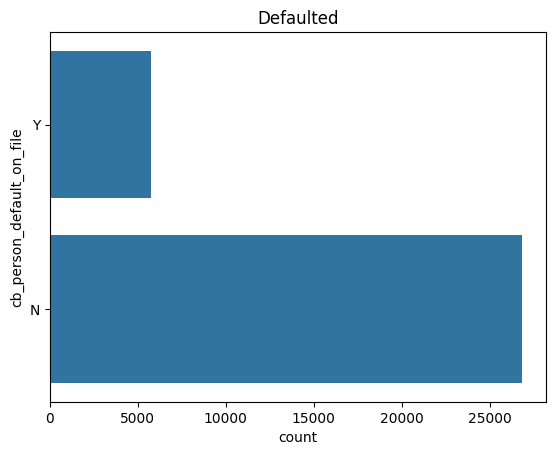

In [48]:
## Defaulted ##
figsize=(10,8)
plt.title('Defaulted')
sns.countplot(data['cb_person_default_on_file'])

<Axes: title={'center': 'Loan Percent Income'}, xlabel='loan_percent_income', ylabel='Count'>

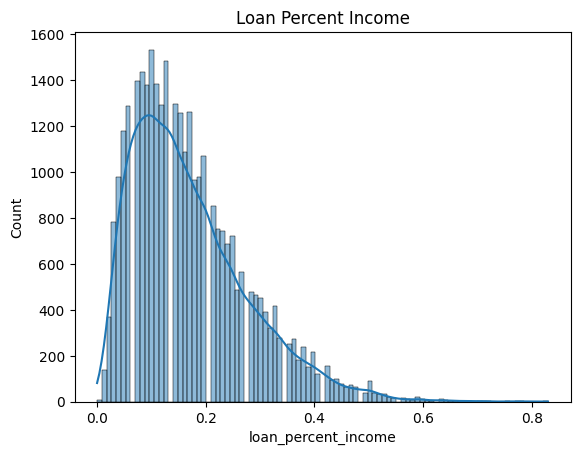

In [49]:
## Loan Percent Income ##
figsize=(10,8)
plt.title('Loan Percent Income')
sns.histplot(data['loan_percent_income'], kde=True)

In [50]:
data['loan_status'] = pd.Categorical(data['loan_status'])

<Axes: xlabel='count', ylabel='loan_status'>

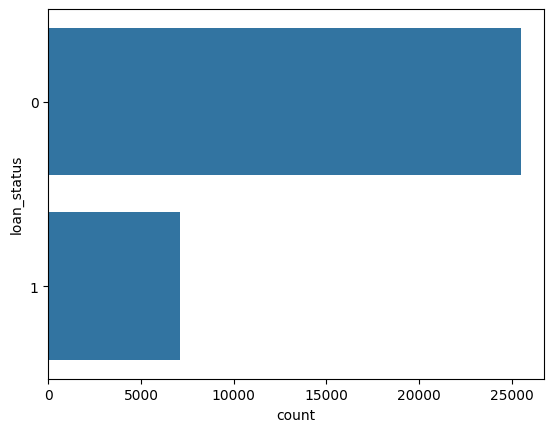

In [51]:
sns.countplot(data['loan_status'])

**Bivariate Analysis**

<Axes: >

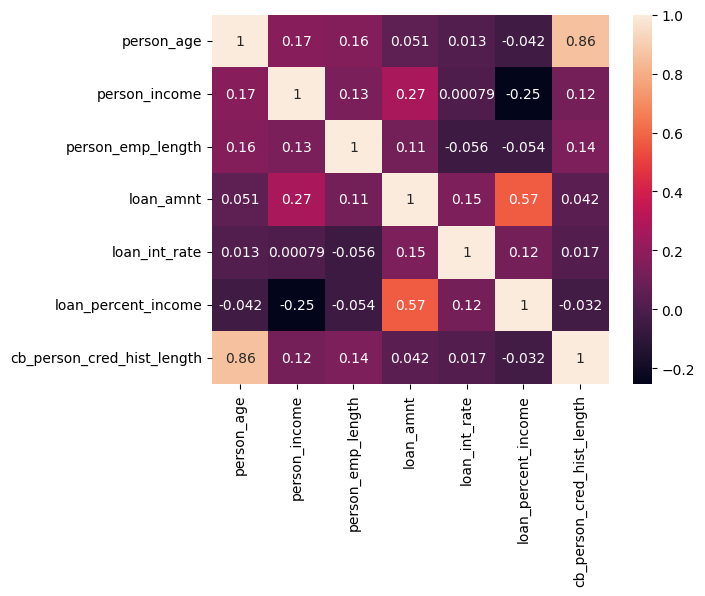

In [52]:
figsize=(20,10)
sns.heatmap(data.corr(numeric_only=True), annot=True)



*   Person's age is highly correlated with credit history, which is understandable
*   Loan amount and loan percent income seem to be highly correlated




In [53]:
def cap_column_value(df, column_name, cap_value):
  """
  Caps the values in a specified column of a DataFrame.

  Args:
    df: The DataFrame.
    column_name: The name of the column to cap.
    cap_value: The maximum value to allow in the column.

  Returns:
    The DataFrame with the capped column.
  """
  df[column_name] = np.where(df[column_name] > cap_value, cap_value, df[column_name])
  return df

In [68]:
data2 = cap_column_value(data, 'person_age', 100)
data2 = cap_column_value(data2, 'person_emp_length', 60)
data2 = cap_column_value(data2, 'loan_percent_income', .6)


In [69]:
data2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,60.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [70]:
data2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.729137,6.607485e+04,4.785710,9589.371106,11.011695,0.170101,5.804211
std,6.268787,6.198312e+04,4.058539,6322.086646,3.240459,0.106319,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,100.000000,6.000000e+06,60.000000,35000.000000,23.220000,0.600000,30.000000


**Data Preprocessing - Convert categorical columns using one-hot encoding**



*   Apply one-hot encoding to Categorical columns : person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file



In [71]:
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status',
       'cb_person_default_on_file'],
      dtype='object')


In [72]:
categorical_columns = categorical_columns.drop('loan_status')

In [73]:
# Apply one-hot encoding
data2 = pd.get_dummies(data2, columns=categorical_columns, drop_first=True, dtype=int)

# Display the updated DataFrame
data2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,60.0,35000,16.02,1,0.59,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1


**Model Building**



In [75]:
X = data2.drop('loan_status', axis=1)
y = data2['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=42)

In [76]:
# Create a decision tree classifier
model1 = DecisionTreeClassifier(random_state=42)

# Train the model
model1.fit(X_train,y_train)

# Make the predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("F1 Score = ", f1_score(y_test, y_pred))

Accuracy =  0.8676769614425475
Recall =  0.7448799435028248
Precision =  0.6779688253254057
F1 Score =  0.7098510978379743


**New record**

In [115]:
new_data = pd.DataFrame([{'person_age':45,
                         'person_income':34000,
                         'person_emp_length':15.0,
                         'loan_amnt':20000,
                         'loan_int_rate':18.0,
                         'loan_percent_income':0.55,
                         'cb_person_cred_hist_length':5,
                         'person_home_ownership': 'RENT',
                         'loan_intent': 'EDUCATION',
                         'loan_grade': 'B',
                         'cb_person_default_on_file': 'Y'}])

In [116]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  1 non-null      int64  
 1   person_income               1 non-null      int64  
 2   person_emp_length           1 non-null      float64
 3   loan_amnt                   1 non-null      int64  
 4   loan_int_rate               1 non-null      float64
 5   loan_percent_income         1 non-null      float64
 6   cb_person_cred_hist_length  1 non-null      int64  
 7   person_home_ownership       1 non-null      object 
 8   loan_intent                 1 non-null      object 
 9   loan_grade                  1 non-null      object 
 10  cb_person_default_on_file   1 non-null      object 
dtypes: float64(3), int64(4), object(4)
memory usage: 216.0+ bytes


**Data Preprocessing for new records**

In [117]:
new_data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,45,34000,15.0,20000,18.0,0.55,5,RENT,EDUCATION,B,Y


In [119]:
# Apply one-hot encoding to new data
new_data_encoded = pd.get_dummies(new_data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], dtype=int)
print("new_data_encoded", new_data_encoded)


# Align columns with training data
new_data_encoded = new_data_encoded.reindex(columns=data2.columns, fill_value=0)

# Display the updated DataFrame
print(new_data_encoded)

new_data_encoded    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          45          34000               15.0      20000           18.0   

   loan_percent_income  cb_person_cred_hist_length  \
0                 0.55                           5   

   person_home_ownership_RENT  loan_intent_EDUCATION  loan_grade_B  \
0                           1                      1             1   

   cb_person_default_on_file_Y  
0                            1  
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          45          34000               15.0      20000           18.0   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            0                 0.55                           5   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                            0                          0  ...   

   loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   

In [121]:
new_data_encoded.drop('loan_status', axis=1, inplace=True)

In [125]:
model1.predict(new_data_encoded)

array([1])

**Save the Model**

In [126]:
import pickle

# Save the trained model to a file
filename = 'credit_risk_model.pkl'
pickle.dump(model1, open(filename, 'wb'))
